In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T # each col represents an example
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255. 

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

print(X_dev.shape[0])

784


In [4]:
def init_params():
    W1 = np.random.randn(10, 784) * 0.01
    b1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * 0.01
    b2 = np.zeros((10, 1))
    return W1, W2, b1, b2

In [5]:
def ReLU(Z):
    return np.maximum(Z, 0)
    
def softmax(Z):
    S = np.exp(Z) / sum(np.exp(Z))
    return S

In [6]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [7]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def ReLU_derivative(Z):
    return Z > 0

In [8]:
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y =  one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * np.dot(dZ2, A1.T)
    db2 = 1 / m * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * ReLU_derivative(Z1)
    dW1 = 1 / m * np.dot(dZ1, X.T)
    db1 = 1 / m * np.sum(dZ1, axis = 1, keepdims = True)
    return dW1, dW2, db1, db2

In [9]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [10]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, W2, b1, b2 = init_params()

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, dW2, db1, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [11]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1500, 0.10)

Iteration:  0
[6 6 6 ... 6 6 5] [6 0 5 ... 2 8 2]
0.09585365853658537
Iteration:  100
[6 0 0 ... 6 6 2] [6 0 5 ... 2 8 2]
0.5214146341463415
Iteration:  200
[6 0 5 ... 9 5 2] [6 0 5 ... 2 8 2]
0.8011219512195122
Iteration:  300
[6 0 5 ... 9 8 2] [6 0 5 ... 2 8 2]
0.8624390243902439
Iteration:  400
[6 0 5 ... 9 8 2] [6 0 5 ... 2 8 2]
0.8847317073170732
Iteration:  500
[6 0 5 ... 9 8 2] [6 0 5 ... 2 8 2]
0.894609756097561
Iteration:  600
[6 0 5 ... 8 8 2] [6 0 5 ... 2 8 2]
0.900609756097561
Iteration:  700
[6 0 5 ... 8 8 2] [6 0 5 ... 2 8 2]
0.9051463414634147
Iteration:  800
[6 0 5 ... 8 8 2] [6 0 5 ... 2 8 2]
0.9085121951219512
Iteration:  900
[6 0 5 ... 8 8 2] [6 0 5 ... 2 8 2]
0.9118048780487805
Iteration:  1000
[6 0 5 ... 8 8 2] [6 0 5 ... 2 8 2]
0.9143170731707317
Iteration:  1100
[6 0 5 ... 8 8 2] [6 0 5 ... 2 8 2]
0.9159512195121952
Iteration:  1200
[6 0 5 ... 8 8 2] [6 0 5 ... 2 8 2]
0.9177560975609756
Iteration:  1300
[6 0 5 ... 8 8 2] [6 0 5 ... 2 8 2]
0.9189024390243903
Itera

In [12]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


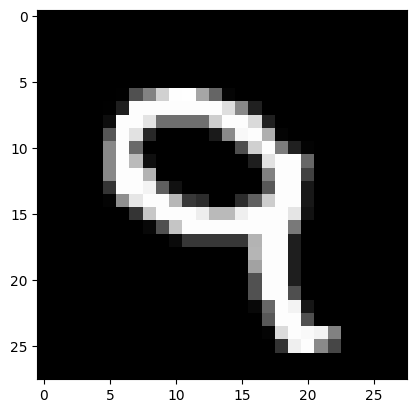

Prediction:  [6]
Label:  6


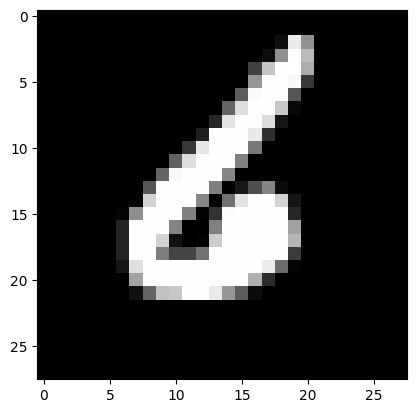

Prediction:  [9]
Label:  9


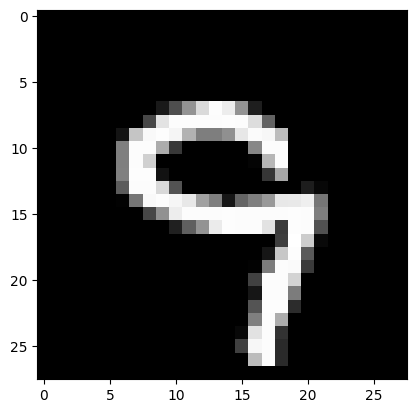

Prediction:  [5]
Label:  5


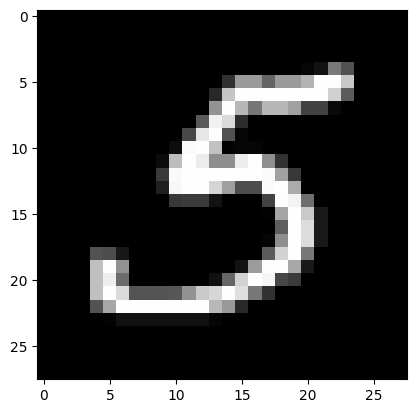

Prediction:  [4]
Label:  4


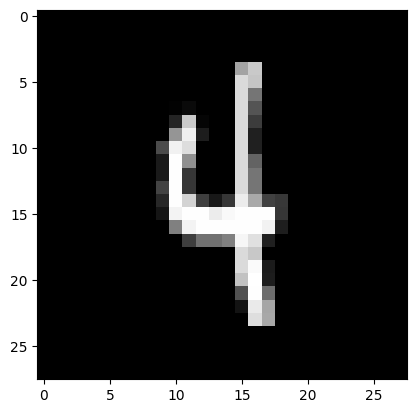

In [13]:
test_prediction(14000, W1, b1, W2, b2)
test_prediction(0, W1, b1, W2, b2)
test_prediction(15, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(4354, W1, b1, W2, b2)

In [14]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 5 5 0 8 3 4 0 2 3 4 2 9 9 4 7 8 1 8 8 7 7 9 0 6 0 3 9 2 6 4 4 6 1 3 1 1
 0 0 5 4 6 0 3 1 9 6 9 8 8 0 6 2 4 8 9 7 4 0 1 9 0 9 9 3 4 1 9 8 1 4 7 6 7
 7 8 7 4 3 1 5 2 8 6 5 3 9 4 6 2 7 7 2 9 5 7 4 8 4 7 5 7 3 4 3 7 3 3 4 1 3
 6 5 6 5 0 2 1 7 8 9 2 8 8 8 5 8 6 3 3 4 8 2 6 7 4 2 3 6 5 3 1 6 9 5 2 1 2
 8 7 2 5 9 0 1 0 4 9 7 3 4 3 3 8 1 0 8 1 5 4 2 2 1 0 8 2 5 7 5 1 3 4 0 0 9
 0 9 8 6 1 1 5 8 3 9 5 0 5 9 9 6 0 7 1 8 1 5 1 5 4 4 4 9 9 9 4 2 1 3 0 3 5
 9 6 2 7 0 6 7 3 1 3 9 3 8 6 5 4 1 9 3 6 3 1 3 5 3 4 8 1 9 4 2 0 2 2 4 2 2
 1 8 5 1 1 0 3 0 0 7 5 6 4 0 2 6 9 9 5 1 5 1 7 0 7 1 1 8 0 3 0 2 4 8 0 0 7
 5 0 4 4 1 1 4 6 9 7 0 0 4 2 9 5 6 2 1 0 6 1 0 1 0 5 2 4 1 6 5 7 3 4 2 1 5
 1 5 2 4 7 8 2 8 5 7 9 2 1 3 7 6 9 9 1 9 8 2 7 5 1 1 9 1 5 3 2 7 2 2 4 5 0
 2 0 4 1 6 0 6 3 6 2 5 1 4 2 2 9 2 2 5 9 1 9 9 6 7 6 1 4 6 4 5 8 2 9 2 6 3
 7 7 5 6 0 7 7 0 3 3 1 3 9 9 3 0 0 6 1 7 4 3 2 2 2 7 7 2 8 3 3 9 2 6 6 6 1
 1 1 8 4 2 6 4 1 9 8 9 4 3 1 9 3 5 3 3 5 0 7 0 6 5 9 8 1 0 0 3 2 4 3 1 9 6
 1 2 5 8 5 9 2 6 4 7 5 3 

0.917

In [15]:
X_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
X_test = X_test / 255
test_predictions = make_predictions(X_test.T, W1, b1, W2, b2)
pd.DataFrame({'ImageId': range(1,len(test_predictions)+1),'Label': test_predictions}).to_csv('submission.csv', index=False)